In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
data = {
    "Age": np.random.randint(10, 90, size=100),
    "Income": np.random.lognormal(mean=10, sigma=1, size=100),
    "Height": np.random.normal(loc=170, scale=10, size=100),
    "Expenses": np.random.gamma(shape=2, scale=500, size=100),
    "Category": np.random.choice([1, 2, 3], size=100)
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Age,Income,Height,Expenses,Category
0,61,18616.338943,168.530546,890.469571,3
1,24,70598.815485,171.806230,506.224735,3
2,81,17227.329265,179.648106,466.949653,1
3,70,10201.930299,159.351688,674.607210,1
4,30,74026.050360,171.087118,526.695064,2
...,...,...,...,...,...
95,42,13062.992619,175.778971,832.277767,2
96,14,22315.435653,191.346412,587.472034,1
97,50,32137.202421,172.268488,1596.365109,1
98,37,23454.662930,186.554616,517.209868,3


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

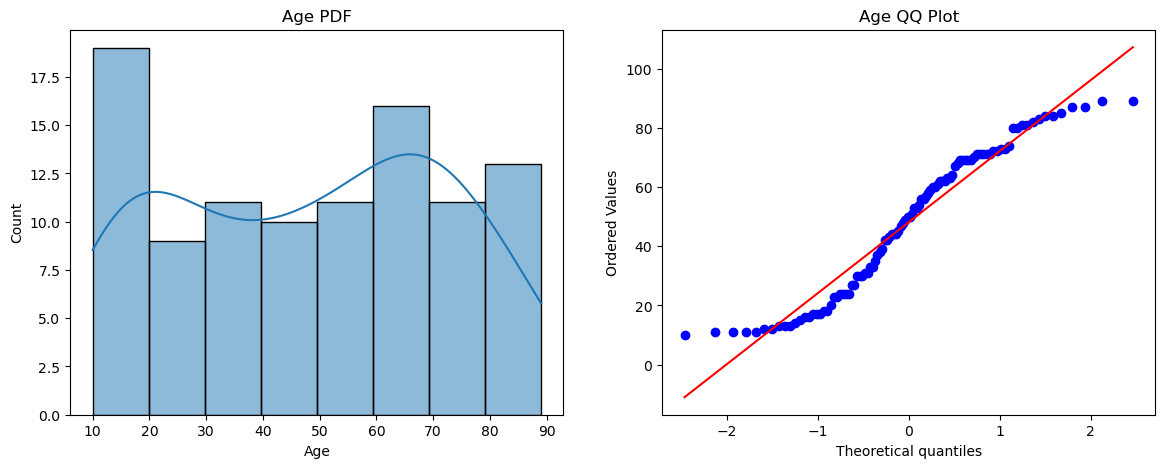

In [3]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Age'],kde=True)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(df["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")
plt.show()

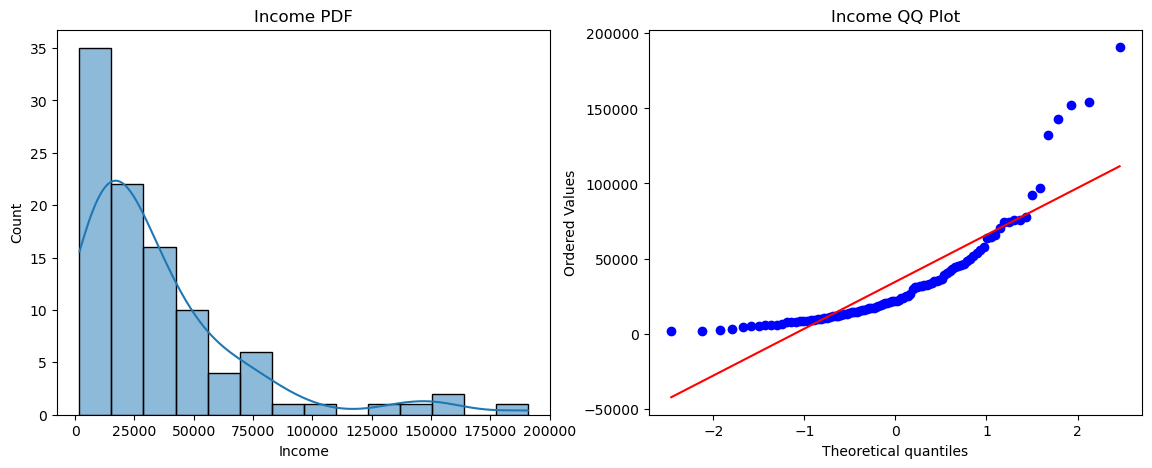

In [4]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Income'],kde=True)
plt.title("Income PDF")

plt.subplot(122)
stats.probplot(df["Income"], dist="norm", plot=plt)
plt.title("Income QQ Plot")
plt.show()

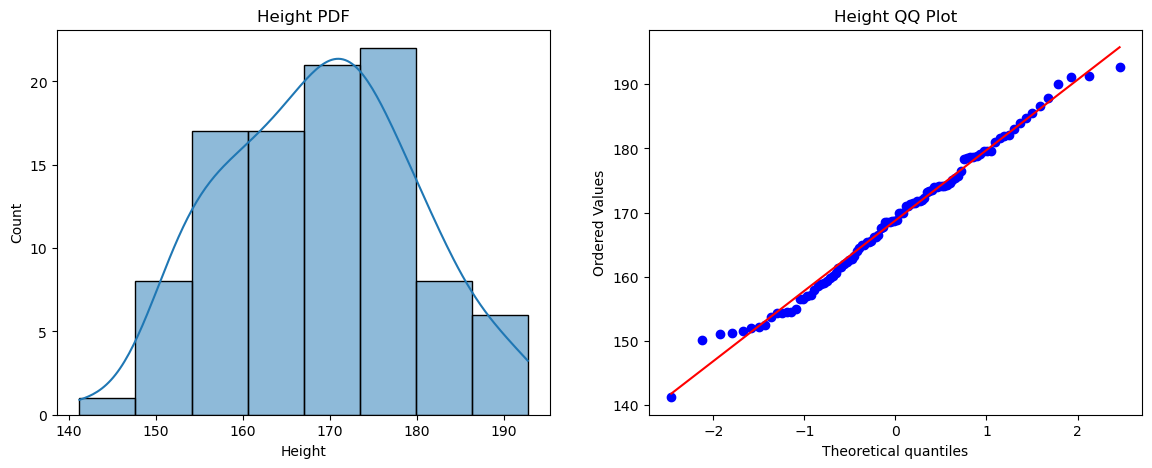

In [5]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Height'],kde=True)
plt.title("Height PDF")

plt.subplot(122)
stats.probplot(df["Height"], dist="norm", plot=plt)
plt.title("Height QQ Plot")
plt.show()

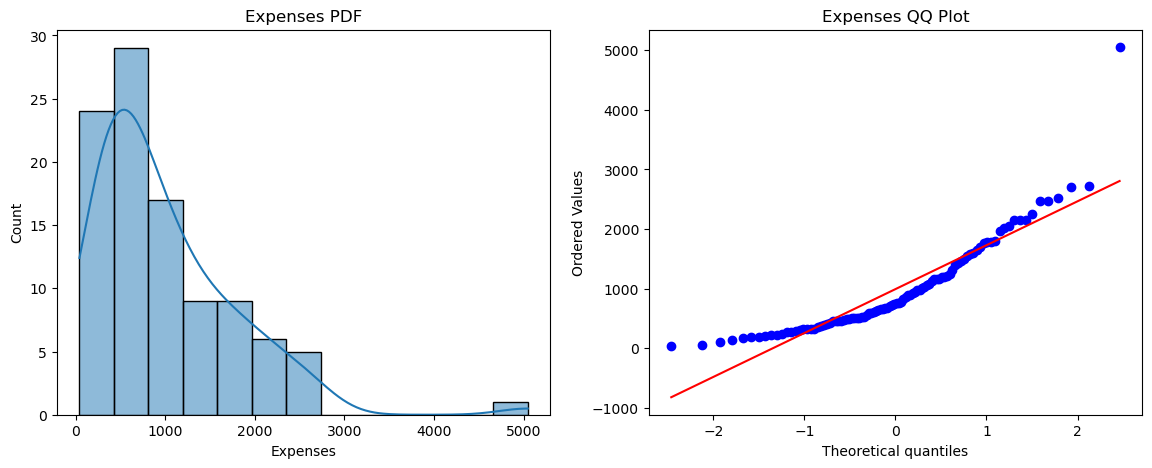

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Expenses'],kde=True)
plt.title("Expenses PDF")

plt.subplot(122)
stats.probplot(df["Expenses"], dist="norm", plot=plt)
plt.title("Expenses QQ Plot")
plt.show()

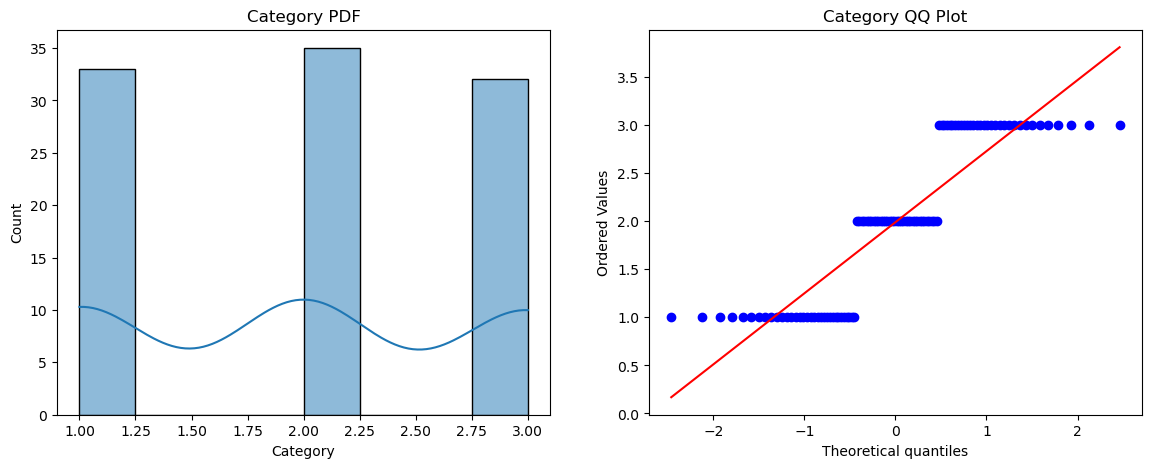

In [7]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Category'],kde=True)
plt.title("Category PDF")

plt.subplot(122)
stats.probplot(df["Category"], dist="norm", plot=plt)
plt.title("Category QQ Plot")
plt.show()

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [19]:
def ApplyTransformation(transform,col):
    df_ = df.copy()
    trf = ColumnTransformer([("Transformation", FunctionTransformer(transform), [col])], remainder='passthrough')
    df_ = trf.fit_transform(df_)
    df_ = pd.DataFrame(df_,index=df.index, columns=df.columns)
    plt.figure(figsize=(14,5))

    plt.subplot(121)
    sns.histplot(df_.iloc[:,0],kde=True)
    plt.title(f"{col}PDF")

    plt.subplot(122)
    stats.probplot(df_.iloc[:,0], dist="norm", plot=plt)
    plt.title(f"{col} QQ Plot")
    plt.show()
    return df_

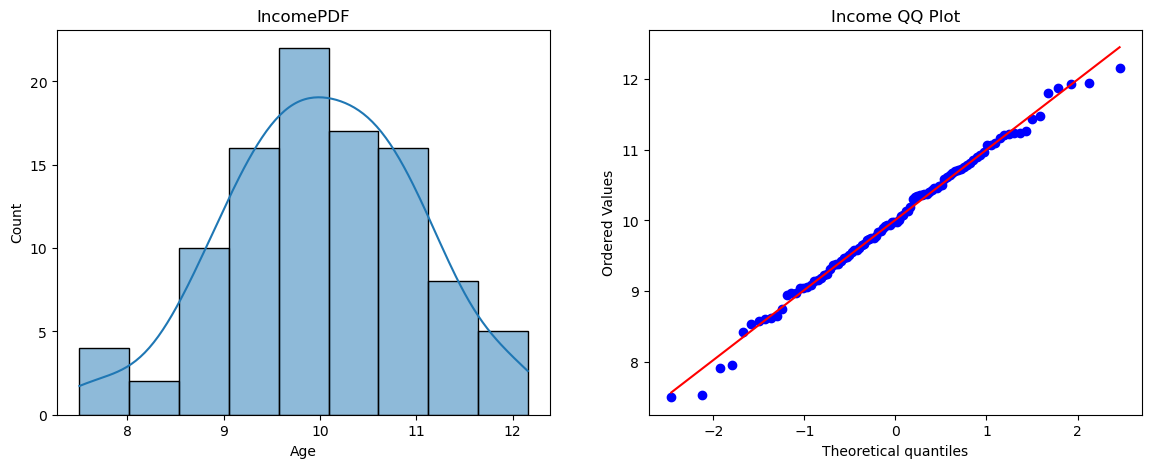

,Age,Income,Height,Expenses,Category
0,9.831849,61.0,168.530546,890.469571,3.0
1,11.164783,24.0,171.806230,506.224735,3.0
2,9.754310,81.0,179.648106,466.949653,1.0
3,9.230430,70.0,159.351688,674.607210,1.0
4,11.212186,30.0,171.087118,526.695064,2.0
...,...,...,...,...,...
95,9.477615,42.0,175.778971,832.277767,2.0
96,10.013079,14.0,191.346412,587.472034,1.0
97,10.377801,50.0,172.268488,1596.365109,1.0
98,10.062867,37.0,186.554616,517.209868,3.0


In [22]:
ApplyTransformation(np.log1p,"Income")

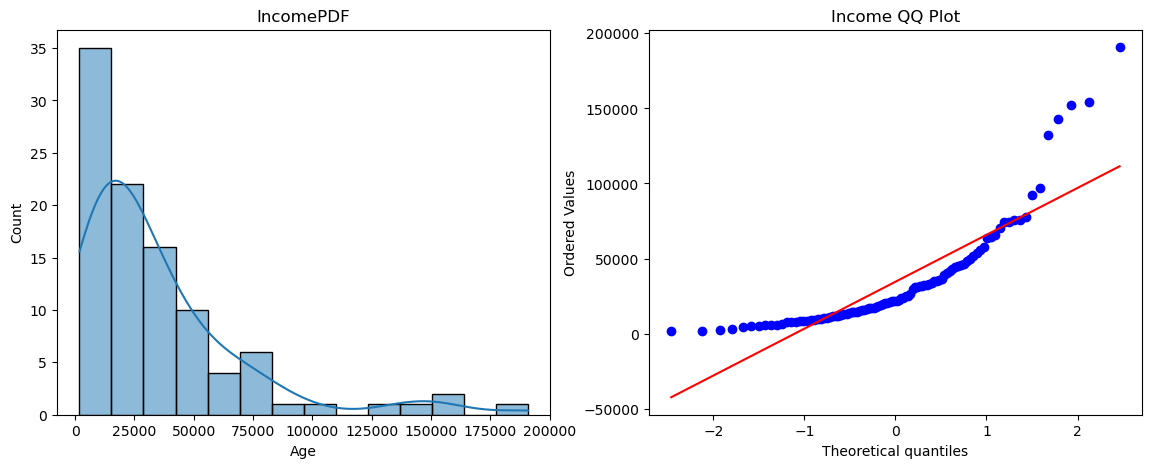

,Age,Income,Height,Expenses,Category
0,18616.338943,61.0,168.530546,890.469571,3.0
1,70598.815485,24.0,171.806230,506.224735,3.0
2,17227.329265,81.0,179.648106,466.949653,1.0
3,10201.930299,70.0,159.351688,674.607210,1.0
4,74026.050360,30.0,171.087118,526.695064,2.0
...,...,...,...,...,...
95,13062.992619,42.0,175.778971,832.277767,2.0
96,22315.435653,14.0,191.346412,587.472034,1.0
97,32137.202421,50.0,172.268488,1596.365109,1.0
98,23454.662930,37.0,186.554616,517.209868,3.0


In [23]:
ApplyTransformation(lambda x: x,"Income")